<a href="https://colab.research.google.com/github/michal00x/Plot/blob/main/relplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

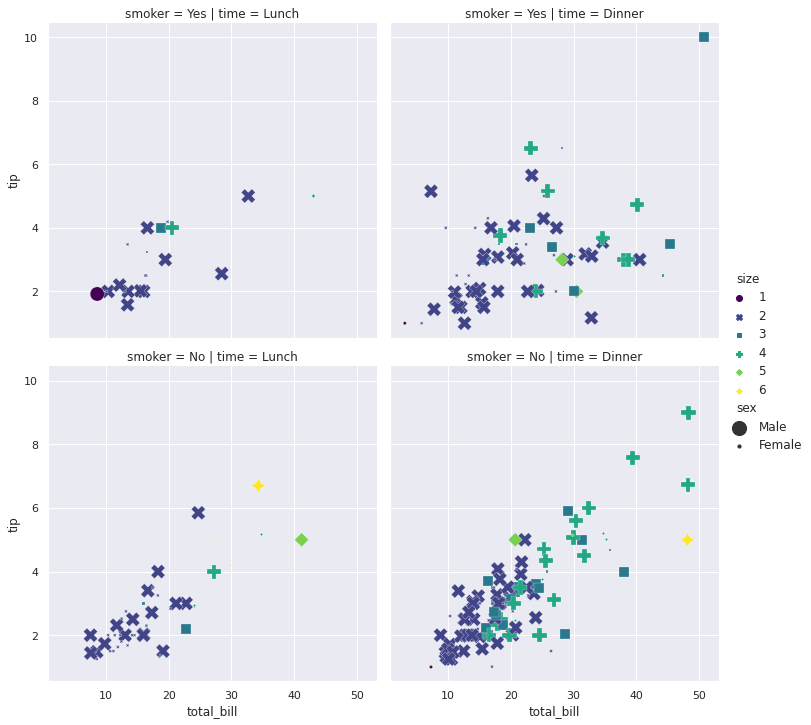

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

'''
x = np.linspace(0,20,100)
y = np.random.randn(100,4)
y = np.cumsum(y, axis=0)
plt.plot(x,y)
'''

df=sns.load_dataset('tips')
'''
df.info()
df.describe(include=['category'])
'''

sns.set(palette='pastel')
sns.relplot(data=df,x='total_bill', y='tip', size='sex',hue='size', sizes=(10,200),style='size',
            palette='viridis',col='time',row='smoker')

In [5]:
df=sns.load_dataset('fmri')
df.head(2)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


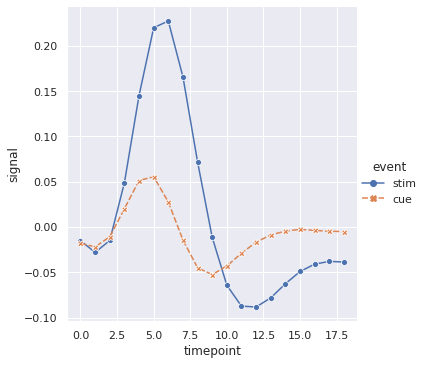

In [6]:
sns.relplot(data=df, x='timepoint',y='signal',hue='event',kind='line',ci=None, style='event',markers=True)


In [3]:
sns.set(style='darkgrid')
df=np.random.multivariate_normal(mean=[0,1],cov=[(1,-0,4), (-0,4,1)],size=200)
df = pd.DataFrame(df,columns=['x','y'])



sns.jointplot(df)

ValueError: ignored

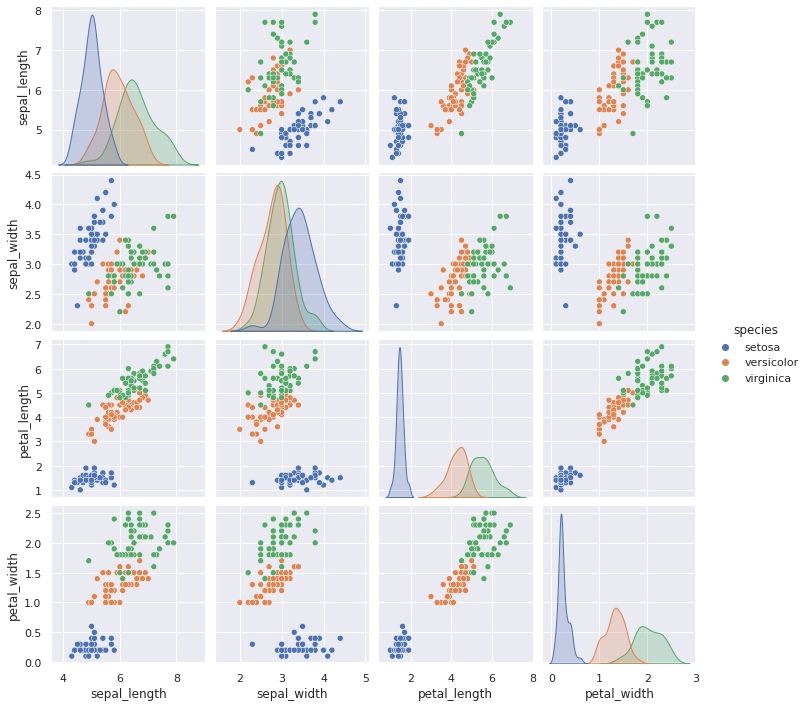

In [9]:
df=sns.load_dataset('iris')
df.head(2)

sns.pairplot(data=df,hue='species')

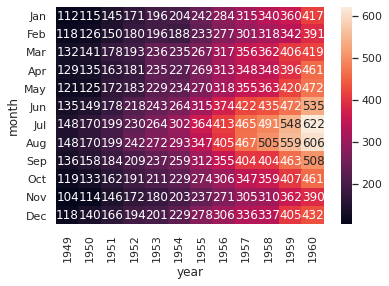

In [14]:
df = sns.load_dataset('flights')
df.head(5)
df = pd.pivot(data=df,index='month',columns='year',values='passengers')
sns.heatmap(df,annot=True,fmt='d')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = ('https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv')

df=pd.read_csv(url)
df.head(2)

TotalChargesMedian = df[df.TotalCharges != ' ']['TotalCharges'].astype('float32').median()
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian
df['TotalCharges'] = df['TotalCharges'].astype('float32')
if not df.isnull().sum().sum():
  print('nie ma braków')

nie ma braków


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [17]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'StreamingMovies',
                   'PaperlessBilling', 'PaymentMethod', 'Churn']
     
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in categorical:
  df[col]= pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype('float32')

df = df.drop(columns='customerID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

Text(0.5, 1.0, 'rozklad churn')

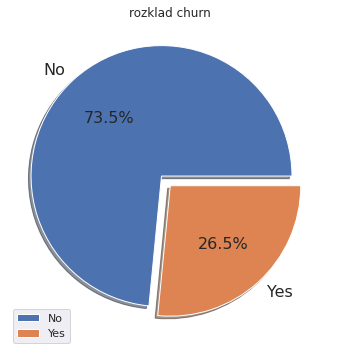

In [29]:
plt.figure(figsize=(8,6))
sns.set()
df.Churn.value_counts().plot(kind='pie',
                             fontsize=16,
                             explode=[0.1,0],
                             shadow=True,
                             autopct='%1.1f%%')

plt.legend()
plt.ylabel('')
plt.title('rozklad churn')